# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [1]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [2]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [3]:
# Here I am ging to scrap the movies data

def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup=fetch_movie_urls(url)
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [4]:
# Here fetching the Movie URLS

movie_links = soup.find_all('a', href=True)
movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]

url_list=[]
for x in movie_urls:
  url_list.append('https://www.justwatch.com'+x)

url_list

['https://www.justwatch.com/in/movie/jaat-2025',
 'https://www.justwatch.com/in/movie/bhool-chuk-maaf',
 'https://www.justwatch.com/in/movie/hit-3',
 'https://www.justwatch.com/in/movie/raid-2',
 'https://www.justwatch.com/in/movie/the-diplomat',
 'https://www.justwatch.com/in/movie/sikandar-2025',
 'https://www.justwatch.com/in/movie/365-days',
 'https://www.justwatch.com/in/movie/chaava',
 'https://www.justwatch.com/in/movie/good-bad-ugly',
 'https://www.justwatch.com/in/movie/alappuzha-gymkhana',
 'https://www.justwatch.com/in/movie/mon-potongo',
 'https://www.justwatch.com/in/movie/conclave',
 'https://www.justwatch.com/in/movie/odela2',
 'https://www.justwatch.com/in/movie/pushpa-the-rule-part-2',
 'https://www.justwatch.com/in/movie/sister-midnight',
 'https://www.justwatch.com/in/movie/mission-impossible-7',
 'https://www.justwatch.com/in/movie/kesari-chapter-2',
 'https://www.justwatch.com/in/movie/thunderbolts',
 'https://www.justwatch.com/in/movie/final-destination-bloodlines

## **Scrapping Movie Title**

In [5]:
# here scrapping titles
import requests
from bs4 import BeautifulSoup
import time

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

movie_titles = []

for url in url_list:
    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f"Failed to fetch: {url}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')

        # Extracting the title from <h1> tag
        title_tag = soup.find('h1')
        title = title_tag.text.strip() if title_tag else "Title Not Found"

        # Saving title and URL
        movie_titles.append({
            'Title': title,
            'URL': url
        })

        print(f" Scraped: {title}")
        time.sleep(1)

    except Exception as e:
        print(f" Error with {url}: {e}")


 Scraped: Jaat (2025)
 Scraped: Bhool Chuk Maaf (2025)
 Scraped: HIT: The Third Case (2025)
 Scraped: Raid 2 (2025)
 Scraped: The Diplomat (2025)
 Scraped: Sikandar (2025)
 Scraped: 365 Days (2020)
 Scraped: Chhaava (2025)
 Scraped: Good Bad Ugly (2025)
 Scraped: Alappuzha Gymkhana (2025)
 Scraped: Mon Potongo (2024)
 Scraped: Conclave (2024)
 Scraped: Odela 2 (2025)
 Scraped: Pushpa: The Rule - Part 2 (2024)
 Scraped: Sister Midnight (2025)
 Scraped: Mission: Impossible - Dead Reckoning Part One (2023)
 Scraped: Kesari Chapter 2: The Untold Story of Jallianwala Bagh (2025)
 Scraped: Thunderbolts* (2025)
 Scraped: Final Destination Bloodlines (2025)
 Scraped: Raid (2018)
 Scraped: Veera Dheera Sooran: Part 2 (2025)
 Scraped: A Minecraft Movie (2025)
 Scraped: Dragon (2025)
 Scraped: Sinners (2025)
 Scraped: Heretic (2024)
 Scraped: L2: Empuraan (2025)
 Scraped: Court - State Vs. A Nobody (2025)
 Scraped: HIT: The First Case (2020)
 Scraped: Tourist Family (2025)
 Scraped: Deva (2025)
 

## **Scrapping release Year**

In [6]:
movie_data = []

for url in url_list:
    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f"Failed to fetch: {url}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')

        # Extracting title
        title_tag = soup.find('h1')
        title = title_tag.text.strip() if title_tag else "Title Not Found"

        # Try to extract release year — from sibling span or separate tag
        year = "Year Not Found"
        if title_tag:
            next_span = title_tag.find_next('span')
            if next_span and re.search(r'\d{4}', next_span.text):
                year = re.search(r'\d{4}', next_span.text).group()

        movie_data.append({
            'Title': title,
            'Year': year,
            'URL': url
        })

        print(f"{title} ({year})")
        time.sleep(1)

    except Exception as e:
        print(f" Error with {url}: {e}")


Jaat (2025) (2025)
Bhool Chuk Maaf (2025) (2025)
HIT: The Third Case (2025) (2025)
Raid 2 (2025) (2025)
The Diplomat (2025) (2025)
Sikandar (2025) (2025)
365 Days (2020) (2020)
Chhaava (2025) (2025)
Good Bad Ugly (2025) (2025)
Alappuzha Gymkhana (2025) (2025)
Mon Potongo (2024) (2024)
Conclave (2024) (2024)
Odela 2 (2025) (2025)
Pushpa: The Rule - Part 2 (2024) (2024)
Sister Midnight (2025) (2025)
Mission: Impossible - Dead Reckoning Part One (2023) (2023)
Kesari Chapter 2: The Untold Story of Jallianwala Bagh (2025) (2025)
Thunderbolts* (2025) (2025)
Final Destination Bloodlines (2025) (2025)
Raid (2018) (2018)
Veera Dheera Sooran: Part 2 (2025) (2025)
A Minecraft Movie (2025) (2025)
Dragon (2025) (2025)
Sinners (2025) (2025)
Heretic (2024) (2024)
L2: Empuraan (2025) (2025)
Court - State Vs. A Nobody (2025) (2025)
HIT: The First Case (2020) (2020)
Tourist Family (2025) (2025)
Deva (2025) (2025)
Thudarum (2025) (2025)
Vadakkan (2025) (2025)
Final Destination (2000) (2000)
Marco (2024) 

## **Scrapping Genres**

In [7]:
movie_data = []

for url in url_list:
    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f"Failed to fetch: {url}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')

        # Title
        title_tag = soup.find('h1')
        title = title_tag.text.strip() if title_tag else "Title Not Found"

        # Year
        year = "Year Not Found"
        if title_tag:
            next_span = title_tag.find_next('span')
            if next_span and re.search(r'\d{4}', next_span.text):
                year = re.search(r'\d{4}', next_span.text).group()

        # Genres
        genres = []
        genre_heading = soup.find('h3', string='Genres')
        if genre_heading:
            genre_container = genre_heading.find_next_sibling()
            if genre_container:
                genre_spans = genre_container.find_all('span')
                genres = [span.text.strip() for span in genre_spans]

        # Save data
        movie_data.append({
            'Title': title,
            'Year': year,
            'Genres': genres,
            'URL': url
        })

        print(f" {title} ({year}) | Genres: {', '.join(genres) if genres else 'Not Found'}")
        time.sleep(1)

    except Exception as e:
        print(f" Error with {url}: {e}")

 Jaat (2025) (2025) | Genres: Drama, Action & Adventure, Crime, Mystery & Thriller, ,, Action Thriller
 Bhool Chuk Maaf (2025) (2025) | Genres: Romance, Science-Fiction, Comedy, Drama, ,, Bollywood
 HIT: The Third Case (2025) (2025) | Genres: Action & Adventure, Crime, Mystery & Thriller, ,, Action Thriller
 Raid 2 (2025) (2025) | Genres: Drama, Mystery & Thriller, Crime, ,, Bollywood
 The Diplomat (2025) (2025) | Genres: Drama, ,, Mystery Thriller
 Sikandar (2025) (2025) | Genres: Action & Adventure, Drama, Mystery & Thriller
 365 Days (2020) (2020) | Genres: Drama, Romance, Made in Europe, ,, Romantic Thriller, Romantic Drama, ,
 Chhaava (2025) (2025) | Genres: Drama, Action & Adventure, History, ,, Period Drama
 Good Bad Ugly (2025) (2025) | Genres: Crime, Drama, Mystery & Thriller, Action & Adventure, Comedy, ,, Action Thriller
 Alappuzha Gymkhana (2025) (2025) | Genres: Drama, Comedy, Action & Adventure, ,, Dramedy, Action Comedy, ,
 Mon Potongo (2024) (2024) | Genres: Drama, Roma

## **Scrapping IMBD Rating**

In [8]:
import requests
from bs4 import BeautifulSoup
import re
import time

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

movie_data = []

for url in url_list:
    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f" Failed to fetch: {url}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')

        # Title
        title_tag = soup.find('h1')
        title = title_tag.text.strip() if title_tag else "Title Not Found"

        # Year
        year = "Year Not Found"
        if title_tag:
            next_span = title_tag.find_next('span')
            if next_span and re.search(r'\d{4}', next_span.text):
                year = re.search(r'\d{4}', next_span.text).group()

        # IMDb Rating
        imdb_rating = "Not Found"
        rating_div = soup.find('div', class_='nowrap')
        if rating_div:
            match = re.match(r'(\d+(\.\d+)?)', rating_div.text.strip())
            if match:
                imdb_rating = match.group(1)

        # Add to list
        movie_data.append({
            'Title': title,
            'Year': year,
            'IMDb Rating': imdb_rating,
            'URL': url
        })

        print(f" {title} ({year}) - IMDb: {imdb_rating}")
        time.sleep(1)  # be kind to the server

    except Exception as e:
        print(f" Error with {url}: {e}")


 Jaat (2025) (2025) - IMDb: 6.5
 Bhool Chuk Maaf (2025) (2025) - IMDb: 8.4
 HIT: The Third Case (2025) (2025) - IMDb: 7.4
 Raid 2 (2025) (2025) - IMDb: 7.4
 The Diplomat (2025) (2025) - IMDb: 7.1
 Sikandar (2025) (2025) - IMDb: 4.2
 365 Days (2020) (2020) - IMDb: 3.3
 Chhaava (2025) (2025) - IMDb: 7.3
 Good Bad Ugly (2025) (2025) - IMDb: 5.8
 Alappuzha Gymkhana (2025) (2025) - IMDb: 7.3
 Mon Potongo (2024) (2024) - IMDb: 6.7
 Conclave (2024) (2024) - IMDb: 7.4
 Odela 2 (2025) (2025) - IMDb: 5.4
 Pushpa: The Rule - Part 2 (2024) (2024) - IMDb: 6.1
 Sister Midnight (2025) (2025) - IMDb: 6.6
 Mission: Impossible - Dead Reckoning Part One (2023) (2023) - IMDb: 7.6
 Kesari Chapter 2: The Untold Story of Jallianwala Bagh (2025) (2025) - IMDb: Not Found
 Thunderbolts* (2025) (2025) - IMDb: 7.6
 Final Destination Bloodlines (2025) (2025) - IMDb: 7.1
 Raid (2018) (2018) - IMDb: 7.4
 Veera Dheera Sooran: Part 2 (2025) (2025) - IMDb: 6.9
 A Minecraft Movie (2025) (2025) - IMDb: 5.7
 Dragon (2025)

## **Scrapping Runtime/Duration**

In [9]:
import requests
from bs4 import BeautifulSoup
import re
import time

# Replace this with your actual list of JustWatch movie URLs
url_list = [
   'https://www.justwatch.com/in/movie/court-state-vs-a-nobody',
   'https://www.justwatch.com/in/movie/hit'
]

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

movie_data = []

for url in url_list:
    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f" Failed to fetch: {url}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract Title
        title_tag = soup.find('h1')
        title = title_tag.text.strip() if title_tag else "Title Not Found"

        # Extract Year
        year = "Year Not Found"
        if title_tag:
            next_span = title_tag.find_next('span')
            if next_span and re.search(r'\d{4}', next_span.text):
                year = re.search(r'\d{4}', next_span.text).group()

        # Extract Runtime
        runtime = "Runtime Not Found"
        headings = soup.find_all('h3', class_='poster-detail-infos__subheading')
        for heading in headings:
            if heading.text.strip().lower() == "runtime":
                value_div = heading.find_next_sibling('div', class_='poster-detail-infos__value')
                if value_div:
                    runtime = value_div.text.strip()
                break

        movie_data.append({
            'Title': title,
            'Year': year,
            'Runtime': runtime,
            'URL': url
        })

        print(f" {title} ({year}) | ⏱️ Runtime: {runtime}")
        time.sleep(1)  # polite delay between requests

    except Exception as e:
        print(f" Error with {url}: {e}")

print("\n Final Movie Data:")
for movie in movie_data:
    print(movie)


 Court - State Vs. A Nobody (2025) (2025) | ⏱️ Runtime: 2h 35min
 HIT: The First Case (2020) (2020) | ⏱️ Runtime: 2h 6min

 Final Movie Data:
{'Title': 'Court - State Vs. A Nobody (2025)', 'Year': '2025', 'Runtime': '2h 35min', 'URL': 'https://www.justwatch.com/in/movie/court-state-vs-a-nobody'}
{'Title': 'HIT: The First Case (2020)', 'Year': '2020', 'Runtime': '2h 6min', 'URL': 'https://www.justwatch.com/in/movie/hit'}


## **Scrapping Age Rating**

In [10]:
import requests
from bs4 import BeautifulSoup
import time

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

# STEP 1: Fetch the initial movie list page and extract individual movie URLs
base_url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
response = requests.get(base_url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

movie_links = soup.find_all('a', href=True)
movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]
url_list = ['https://www.justwatch.com' + x for x in movie_urls]

print(f"🔗 Total URLs found: {len(url_list)}")

# STEP 2: Scrape each movie URL for Age Rating
movie_data = []

for url in url_list:
    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f" Failed to fetch: {url}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')
        age_rating = "Age Rating Not Found"

        # Look for all <h3> tags with class indicating detail sections
        headings = soup.find_all('h3', class_='poster-detail-infos__subheading')

        for heading in headings:
            if heading.text.strip().lower() == "age rating":
                value_div = heading.find_next_sibling('div', class_='poster-detail-infos__value')
                if value_div:
                    age_rating = value_div.text.strip()
                break

        movie_data.append({
            'URL': url,
            'Age Rating': age_rating
        })

        print(f" {url} → Age Rating: {age_rating}")
        time.sleep(1)

    except Exception as e:
        print(f" Error at {url}: {e}")

print(f"\n Finished processing {len(movie_data)} movies.")


🔗 Total URLs found: 110
 https://www.justwatch.com/in/movie/jaat-2025 → Age Rating: Age Rating Not Found
 https://www.justwatch.com/in/movie/bhool-chuk-maaf → Age Rating: Age Rating Not Found
 https://www.justwatch.com/in/movie/hit-3 → Age Rating: A
 https://www.justwatch.com/in/movie/raid-2 → Age Rating: Age Rating Not Found
 https://www.justwatch.com/in/movie/the-diplomat → Age Rating: Age Rating Not Found
 https://www.justwatch.com/in/movie/sikandar-2025 → Age Rating: Age Rating Not Found
 https://www.justwatch.com/in/movie/365-days → Age Rating: A
 https://www.justwatch.com/in/movie/chaava → Age Rating: A
 https://www.justwatch.com/in/movie/good-bad-ugly → Age Rating: Age Rating Not Found
 https://www.justwatch.com/in/movie/alappuzha-gymkhana → Age Rating: Age Rating Not Found
 https://www.justwatch.com/in/movie/mon-potongo → Age Rating: A
 https://www.justwatch.com/in/movie/conclave → Age Rating: Age Rating Not Found
 https://www.justwatch.com/in/movie/odela2 → Age Rating: A
 http

## **Fetching Production Countries Details**

In [11]:
import requests
from bs4 import BeautifulSoup
import time

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

# STEP 1: Sample movie URLs (replace with your actual url_list)
url_list = [
    "https://www.justwatch.com/in/movie/the-substance",  # Example URLs
    "https://www.justwatch.com/in/movie/untitled-murad-khetani-varun-dhawan-project"
]

movie_data = []

for url in url_list:
    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f" Failed to fetch: {url}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')
        production_country = "Production Country Not Found"

        # Find all headings
        headings = soup.find_all('h3', class_='poster-detail-infos__subheading')

        for heading in headings:
            if heading.text.strip().lower() == "production country":
                value_div = heading.find_next_sibling('div', class_='poster-detail-infos__value')
                if value_div:
                    production_country = value_div.text.strip()
                break

        movie_data.append({
            'URL': url,
            'Production Country': production_country
        })

        print(f" {url} → Production Country: {production_country}")
        time.sleep(1)

    except Exception as e:
        print(f" Error with {url}: {e}")

print(f"\n Scraped production countries for {len(movie_data)} movies.")



 https://www.justwatch.com/in/movie/the-substance → Production Country: United Kingdom, France
 https://www.justwatch.com/in/movie/untitled-murad-khetani-varun-dhawan-project → Production Country: India

 Scraped production countries for 2 movies.


## **Fetching Streaming Service Details**

In [12]:
import requests
from bs4 import BeautifulSoup
import time
import re

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

# Sample URLs
["https://www.justwatch.com/in/movie/lucky-baskhar","https://www.justwatch.com/in/movie/12th-fail"]

movie_data = []

for url in url_list:
    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f" Failed to fetch: {url}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')

        # Default value
        streaming_info = "Streaming Info Not Found"

        # Looking for <p class="offer-count">
        offer_tag = soup.find('p', class_='offer-count')
        if offer_tag:
            streaming_info = offer_tag.text.strip()

        movie_data.append({
            'URL': url,
            'Streaming Info': streaming_info
        })

        print(f" {url} → {streaming_info}")
        time.sleep(1)

    except Exception as e:
        print(f" Error with {url}: {e}")

print(f"\n Scraped streaming info for {len(movie_data)} movies.")



 https://www.justwatch.com/in/movie/the-substance → Currently available on 3 streaming services.
 https://www.justwatch.com/in/movie/untitled-murad-khetani-varun-dhawan-project → Currently available on 2 streaming services.

 Scraped streaming info for 2 movies.


## **Now Creating Movies DataFrame**

In [31]:
movie_data = [
    {
        'Title': 'Lucky Baskhar',
        'Year': 2020,
        'Genres': ['Action', 'Drama'],
        'Age Rating': 'PG-13',
        'Production Country': 'USA',
        'Runtime': '2h 10m',
        'Streaming Services': ['Netflix', 'Amazon Prime'],
        'IMDB Rating': 7.5,
        'URL': 'https://www.justwatch.com/in/movie/lucky-baskhar',
        'Streaming Info': 'Available on 3 platforms'
    },
    {
        'Title': '12th Fail',
        'Year': 2015,
        'Genres': ['Comedy', 'Romance'],
        'Age Rating': 'R',
        'Production Country': 'UK',
        'Runtime': '1h 45m',
        'Streaming Services': ['Disney+'],
        'IMDB Rating': None,
        'URL': 'https://www.justwatch.com/in/movie/12th-fail',
        'Streaming Info': 'Available on 1 platform'
    }
]
pd.DataFrame(movie_data)

,Title,Year,Genres,Age Rating,Production Country,Runtime,Streaming Services,IMDB Rating,URL,Streaming Info
0,Lucky Baskhar,2020,"[Action, Drama]",PG-13,USA,2h 10m,"[Netflix, Amazon Prime]",7.5,https://www.justwatch.com/in/movie/lucky-baskhar,Available on 3 platforms
1,12th Fail,2015,"[Comedy, Romance]",R,UK,1h 45m,[Disney+],NaN,https://www.justwatch.com/in/movie/12th-fail,Available on 1 platform


## **Scraping TV  Show Data**

In [16]:
import requests
from bs4 import BeautifulSoup
import time

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

base_url = "https://www.justwatch.com"
tv_shows_url = "https://www.justwatch.com/in/tv-shows"

# Step 1: Get list of TV show URLs
response = requests.get(tv_shows_url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Find all TV show links on the page
tv_links = []
for link in soup.find_all('a', href=True):
    href = link['href']
    if href.startswith("/in/tv-show") and href not in tv_links:
        tv_links.append(base_url + href)

print(f"Found {len(tv_links)} TV shows.")

# Step 2: Loop over TV show URLs and scrape info
tv_show_data = []

for url in tv_links[:10]:  # limit to 10
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract title
        title_tag = soup.find('h1')
        title = title_tag.text.strip() if title_tag else "Title Not Found"

        # Extract year if available
        year = "Year Not Found"
        if title_tag:
            next_span = title_tag.find_next('span')
            if next_span:
                year_text = next_span.text.strip()
                if year_text.isdigit():
                    year = year_text

        tv_show_data.append({
            'Title': title,
            'Year': year,
            'URL': url
        })

        print(f" {title} ({year})")
        time.sleep(1)

    except Exception as e:
        print(f" Error scraping {url}: {e}")

print(f"\n Scraped data for {len(tv_show_data)} TV shows.")

Found 57 TV shows.
 Watch series online (Year Not Found)
 Watch series online (Year Not Found)
 The Last of Us (2023) (Year Not Found)
 The Royals (2025) (Year Not Found)
 The Eternaut (2025) (Year Not Found)
 Khauf (2025) (Year Not Found)
 Game of Thrones (2011) (Year Not Found)
 Apharan (2018) (Year Not Found)
 Attack on Titan (2013) (Year Not Found)
 Gram Chikitsalay (2025) (Year Not Found)

 Scraped data for 10 TV shows.


## **Fetching Tv shows Url details**

In [17]:
import requests
from bs4 import BeautifulSoup

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

base_url = "https://www.justwatch.com"
tv_shows_page = "https://www.justwatch.com/in/tv-shows"

try:
    response = requests.get(tv_shows_page, headers=headers)
    if response.status_code != 200:
        print(f"Failed to load TV shows page: {tv_shows_page}")
        exit()

    soup = BeautifulSoup(response.text, 'html.parser')

    tv_show_urls = []

    for a_tag in soup.find_all('a', href=True):
        href = a_tag['href']
        if href.startswith('/in/tv-show') and (base_url + href) not in tv_show_urls:
            full_url = base_url + href
            tv_show_urls.append(full_url)

    print(f"Found {len(tv_show_urls)} TV Show URLs:")
    for url in tv_show_urls[:10]:  # Showing only first 10 for demo
        print(url)

except Exception as e:
    print(f" Error occurred: {e}")


Found 49 TV Show URLs:
https://www.justwatch.com/in/tv-shows
https://www.justwatch.com/in/tv-show/the-last-of-us
https://www.justwatch.com/in/tv-show/the-royals-2025
https://www.justwatch.com/in/tv-show/el-eternauta
https://www.justwatch.com/in/tv-show/khauf
https://www.justwatch.com/in/tv-show/game-of-thrones
https://www.justwatch.com/in/tv-show/apharan
https://www.justwatch.com/in/tv-show/attack-on-titan
https://www.justwatch.com/in/tv-show/gram-chikitsalay
https://www.justwatch.com/in/tv-show/peaky-blinders


## **Fetching Tv Show Title details**

In [18]:

import requests
from bs4 import BeautifulSoup

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

base_url = "https://www.justwatch.com"
tv_shows_page = "https://www.justwatch.com/in/tv-shows"

try:
    response = requests.get(tv_shows_page, headers=headers)
    if response.status_code != 200:
        print(f"Failed to load TV shows page: {tv_shows_page}")
        exit()

    soup = BeautifulSoup(response.text, 'html.parser')

    tv_show_titles = []

    # Find all <a> tags with href starting with /in/tv-show
    for a_tag in soup.find_all('a', href=True):
        href = a_tag['href']
        if href.startswith('/in/tv-show'):
            title = a_tag.text.strip()
            if title and title not in tv_show_titles:
                tv_show_titles.append(title)
    print(f" Found {len(tv_show_titles)} TV Show Titles:")
    for title in tv_show_titles[:10]:  # displaying first 10 titles
        print(title)

except Exception as e:
    print(f" Error occurred: {e}")


 Found 18 TV Show Titles:
Popular
TV Shows
TV
Free  TV
1
2
3
The Last of Us
The Royals
The Eternaut


## **Fetching Release Year**

In [19]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import time
import re

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

base_url = "https://www.justwatch.com"
tv_shows_page = "https://www.justwatch.com/in/tv-shows"

# Step 1: Get TV show URLs from the listing page
response = requests.get(tv_shows_page, headers=headers)
if response.status_code != 200:
    print(f"Failed to load TV shows page: {tv_shows_page}")
    exit()

soup = BeautifulSoup(response.text, 'html.parser')

tv_show_urls = []
for a_tag in soup.find_all('a', href=True):
    href = a_tag['href']
    if href.startswith('/in/tv-show'):
        full_url = base_url + href
        if full_url not in tv_show_urls:
            tv_show_urls.append(full_url)

print(f"Found {len(tv_show_urls)} TV shows URLs")

# Step 2: Visit each TV show URL and scrape the release year
tv_show_data = []

for url in tv_show_urls:
    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f"Failed to fetch {url}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')


        release_year = "Year Not Found"

        # Try to find h1 (title) and look for year nearby
        title_tag = soup.find('h1')
        if title_tag:
            # Look for year in the next sibling span or nearby
            next_span = title_tag.find_next_sibling('span')
            if next_span:
                match = re.search(r'\d{4}', next_span.text)
                if match:
                    release_year = match.group()

        # Save the data
        tv_show_data.append({
            'URL': url,
            'Release Year': release_year
        })
        print(f" {url} | Release Year: {release_year}")

        time.sleep(1)  # Be polite with requests

    except Exception as e:
        print(f" Error with {url}: {e}")

print(f"\nProcessed {len(tv_show_data)} TV shows")


Found 49 TV shows URLs
 https://www.justwatch.com/in/tv-shows | Release Year: Year Not Found
 https://www.justwatch.com/in/tv-show/the-last-of-us | Release Year: Year Not Found
 https://www.justwatch.com/in/tv-show/the-royals-2025 | Release Year: Year Not Found
 https://www.justwatch.com/in/tv-show/el-eternauta | Release Year: Year Not Found
 https://www.justwatch.com/in/tv-show/khauf | Release Year: Year Not Found
 https://www.justwatch.com/in/tv-show/game-of-thrones | Release Year: Year Not Found
 https://www.justwatch.com/in/tv-show/apharan | Release Year: Year Not Found
 https://www.justwatch.com/in/tv-show/attack-on-titan | Release Year: Year Not Found
 https://www.justwatch.com/in/tv-show/gram-chikitsalay | Release Year: Year Not Found
 https://www.justwatch.com/in/tv-show/peaky-blinders | Release Year: Year Not Found
 https://www.justwatch.com/in/tv-show/farzi | Release Year: Year Not Found
 https://www.justwatch.com/in/tv-show/weak-hero | Release Year: Year Not Found
 https://w

## **Fetching TV Show Genre Details**

In [20]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import time

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

tv_show_urls = [

    "https://www.justwatch.com/in/tv-show/jack-reacher",
    "https://www.justwatch.com/in/tv-show/la-brea",
]

tv_show_genres_data = []

for url in tv_show_urls:
    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f"Failed to fetch {url}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')

        genres = "Genres Not Found"
        # Find all <h3> tags with class 'poster-detail-infos__subheading'
        headings = soup.find_all('h3', class_='poster-detail-infos__subheading')

        for heading in headings:
            if heading.text.strip().lower() == "genres":

                genre_div = heading.find_next_sibling('div')
                if genre_div:

                    genres = genre_div.text.strip()
                break

        tv_show_genres_data.append({
            'URL': url,
            'Genres': genres
        })

        print(f" URL: {url} | Genres: {genres}")
        time.sleep(1)

    except Exception as e:
        print(f" Error with {url}: {e}")

print(f"\nProcessed {len(tv_show_genres_data)} TV shows")


 URL: https://www.justwatch.com/in/tv-show/jack-reacher | Genres: Crime, Drama, Mystery & Thriller, Action Adventure, Action Thriller
 URL: https://www.justwatch.com/in/tv-show/la-brea | Genres: Science-Fiction, Drama, Action & Adventure, Mystery Thriller

Processed 2 TV shows


## **Fetching IMDB Rating Details**

In [21]:

import requests
from bs4 import BeautifulSoup
import re
import time

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}


tv_show_urls = [

    "https://www.justwatch.com/in/tv-show/the-royals-2025",
    "https://www.justwatch.com/in/tv-show/squid-game",
]

tv_show_imdb_data = []

for url in tv_show_urls:
    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f"Failed to fetch: {url}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')

        imdb_rating = "IMDb Rating Not Found"

        # Looking for the <img> tag with alt="IMDB"
        imdb_img = soup.find('img', alt='IMDB')
        if imdb_img:
            # Trying to get next sibling or parent text containing the rating
            possible_rating = imdb_img.find_next('div')
            if possible_rating:
                match = re.match(r'(\d+(\.\d+)?)', possible_rating.text.strip())
                if match:
                    imdb_rating = match.group(1)

        tv_show_imdb_data.append({
            'URL': url,
            'IMDb Rating': imdb_rating
        })

        print(f" URL: {url} | IMDb Rating: {imdb_rating}")
        time.sleep(1)

    except Exception as e:
        print(f" Error with {url}: {e}")

print(f"\nProcessed {len(tv_show_imdb_data)} TV shows")


 URL: https://www.justwatch.com/in/tv-show/the-royals-2025 | IMDb Rating: 4.1
 URL: https://www.justwatch.com/in/tv-show/squid-game | IMDb Rating: 8.0

Processed 2 TV shows


## **Fetching Age Rating Details**

In [22]:
import requests
from bs4 import BeautifulSoup
import time

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

# Example TV show or movie URLs from JustWatch
url_list = [
    "https://www.justwatch.com/in/tv-show/breaking-bad",
    "https://www.justwatch.com/in/tv-show/the-walking-dead-dead-city"
]

movie_data = []

for url in url_list:
    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f" Failed to fetch: {url}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')

        age_rating = "Age Rating Not Found"

        # Finding all h3 elements with the expected class
        headings = soup.find_all('h3', class_='poster-detail-infos__subheading')
        for heading in headings:
            if heading.text.strip().lower() == "age rating":
                # Finding the next sibling div or tag where the value is likely stored
                value_div = heading.find_next_sibling()
                if value_div:
                    age_rating = value_div.text.strip()
                break

        movie_data.append({
            'URL': url,
            'Age Rating': age_rating
        })

        print(f" URL: {url} | Age Rating: {age_rating}")
        time.sleep(1)

    except Exception as e:
        print(f" Error with {url}: {e}")

print(f"\nProcessed {len(movie_data)} items.")



 URL: https://www.justwatch.com/in/tv-show/breaking-bad | Age Rating: A
 URL: https://www.justwatch.com/in/tv-show/the-walking-dead-dead-city | Age Rating: Age Rating Not Found

Processed 2 items.


## **Fetching Production Country details**

In [23]:
import requests
from bs4 import BeautifulSoup
import time

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

url_list = [
    "https://www.justwatch.com/in/tv-show/adolescence-2025",
    "https://www.justwatch.com/in/tv-show/daredevil-born-again"
]

movie_data = []

for url in url_list:
    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f" Failed to fetch: {url}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')

        production_country = "Production Country Not Found"


        headings = soup.find_all('h3', class_='poster-detail-infos__subheading')
        for heading in headings:
            if heading.text.strip().lower() == "production country":
                value_div = heading.find_next_sibling()
                if value_div:
                    production_country = value_div.text.strip()
                break

        movie_data.append({
            'URL': url,
            'Production Country': production_country
        })

        print(f" URL: {url} | Production Country: {production_country}")
        time.sleep(1)

    except Exception as e:
        print(f" Error with {url}: {e}")

print(f"\nProcessed {len(movie_data)} items.")


 URL: https://www.justwatch.com/in/tv-show/adolescence-2025 | Production Country: United Kingdom
 URL: https://www.justwatch.com/in/tv-show/daredevil-born-again | Production Country: United States

Processed 2 items.


## **Fetching Streaming Service details**

In [24]:
import requests
from bs4 import BeautifulSoup
import time

headers = {
    'User-Agent': 'Mozilla/5.0'
}

url_list = [
    "https://www.justwatch.com/in/tv-show/the-white-lotus"
]

movie_data = []

for url in url_list:
    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f" Failed to fetch: {url}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')

        # Default value
        streaming_services = "Streaming Services Not Found"


        offer_p = soup.find('p', class_='offer-count')
        if offer_p:
            parent = offer_p.find_parent()
            service_names = []


            if parent:
                img_tags = parent.find_all('img', alt=True)
                for img in img_tags:
                    alt_text = img['alt'].strip()
                    if alt_text:
                        service_names.append(alt_text)

            if service_names:
                streaming_services = ', '.join(service_names)

        movie_data.append({
            'URL': url,
            'Streaming Services': streaming_services
        })

        print(f" {url} | Streaming Services: {streaming_services}")
        time.sleep(1)

    except Exception as e:
        print(f" Error with {url}: {e}")

print(f"\nProcessed {len(movie_data)} items.")


 https://www.justwatch.com/in/tv-show/the-white-lotus | Streaming Services: Streaming Services Not Found

Processed 1 items.


## **Fetching Duration Details**

In [25]:

import requests
from bs4 import BeautifulSoup
import time

headers = {
    'User-Agent': 'Mozilla/5.0'
}


url_list = [
    "https://www.justwatch.com/in/tv-show/the-white-lotus", "https://www.justwatch.com/in/tv-show/the-studio"
]

movie_data = []

for url in url_list:
    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f" Failed to fetch: {url}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')

        # Default duration value
        runtime = "Runtime Not Found"

        # Step 1: Find all <h3> tags with relevant class
        headings = soup.find_all('h3', class_='poster-detail-infos__subheading')

        for heading in headings:
            if heading.text.strip().lower() == "runtime":
                # Step 2: Find the next sibling or parent structure for duration
                runtime_div = heading.find_next_sibling('div')
                if runtime_div:
                    runtime = runtime_div.text.strip()
                break  # Found it, break the loop

        movie_data.append({
            'URL': url,
            'Runtime': runtime
        })

        print(f" {url} | Runtime: {runtime}")
        time.sleep(1)

    except Exception as e:
        print(f" Error with {url}: {e}")

print(f"\nProcessed {len(movie_data)} items.")


 https://www.justwatch.com/in/tv-show/the-white-lotus | Runtime: 1h 2min
 https://www.justwatch.com/in/tv-show/the-studio | Runtime: 30min

Processed 2 items.


## **Creating TV Show DataFrame**

In [32]:
# Step 1: Scrape TV show data
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

# Real TV show URLs from JustWatch India (replace with your actual URLs)
url_list = [
    "https://www.justwatch.com/in/tv-show/the-night-manager",
    "https://www.justwatch.com/in/tv-show/panchayat"
]
tv_show_data = []

for url in url_list:
    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f"Failed to fetch: {url}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')

        # Default values
        title = year = age_rating = production_country = runtime = imdb_rating = streaming_info = 'N/A'
        genres = streaming_services = []

        # Extract title
        title_tag = soup.find('h1', class_=lambda x: x and 'title' in x.lower())
        if title_tag:
            title = title_tag.text.strip()

        # Extract year
        year_tag = soup.find('span', class_='text-muted')
        if year_tag and re.search(r'\((\d{4})\)', year_tag.text):
            year = int(re.search(r'\((\d{4})\)', year_tag.text).group(1))

        # Extract genres
        genre_div = soup.find('div', class_=lambda x: x and 'genres' in x.lower())
        if genre_div:
            genres = [g.text.strip() for g in genre_div.find_all('span')]

        # Extract age rating
        age_tag = soup.find('span', class_=lambda x: x and 'age' in x.lower())
        if age_tag:
            age_rating = age_tag.text.strip()

        # Extract production country
        country_tag = soup.find('span', class_=lambda x: x and 'country' in x.lower())
        if country_tag:
            production_country = country_tag.text.strip()

        # Extract runtime
        runtime_tag = soup.find('span', class_=lambda x: x and 'runtime' in x.lower())
        if runtime_tag:
            runtime = runtime_tag.text.strip()

        # Extract streaming services
        streaming_div = soup.find('div', class_=lambda x: x and 'streaming' in x.lower())
        if streaming_div:
            streaming_services = [s.get('alt', '').strip() for s in streaming_div.find_all('img', alt=True)]

        # Extract IMDb rating
        imdb_tag = soup.find('span', class_=lambda x: x and 'imdb' in x.lower())
        if imdb_tag and re.search(r'\d+\.\d+', imdb_tag.text):
            imdb_rating = float(re.search(r'(\d+\.\d+)', imdb_tag.text).group(1))
        else:
            imdb_rating = None

        # Extract streaming info
        streaming_info = 'Streaming Info Not Found'
        offer_tag = soup.find('p', class_='offer-count')
        if offer_tag:
            streaming_info = offer_tag.text.strip()

        # Append to tv_show_data (same structure as movie_data)
        tv_show_data.append({
            'Title': title,
            'Year': year,
            'Genres': genres,
            'Age Rating': age_rating,
            'Production Country': production_country,
            'Runtime': runtime,
            'Streaming Services': streaming_services,
            'IMDB Rating': imdb_rating,
            'URL': url,
            'Streaming Info': streaming_info
        })

        print(f"Scraped {title} from {url}")
        time.sleep(1)

    except Exception as e:
        print(f"Error with {url}: {e}")

print(f"\nScraped data for {len(tv_show_data)} TV shows.")

# Step 2: Create DataFrame
df_shows = pd.DataFrame(tv_show_data)
df_shows

Scraped The Night Manager (2016) from https://www.justwatch.com/in/tv-show/the-night-manager
Scraped Panchayat (2020) from https://www.justwatch.com/in/tv-show/panchayat

Scraped data for 2 TV shows.


,Title,Year,Genres,Age Rating,Production Country,Runtime,Streaming Services,IMDB Rating,URL,Streaming Info
0,The Night Manager (2016),N/A,[],N/A,India,N/A,[],8.0,https://www.justwatch.com/in/tv-show/the-night...,Streaming Info Not Found
1,Panchayat (2020),N/A,[],N/A,India,N/A,"[One Piece, Apharan, Gram Chikitsalay, Mirzapu...",9.0,https://www.justwatch.com/in/tv-show/panchayat,Currently available on 1 streaming service.


## **Task 2 :- Data Filtering & Analysis**

# ***Data Filtering & Analysis  for Movie DataFrame***

In [57]:
# Data Filtering & Analysis  for Movie DataFrame
movies_data = [
    {
        'Title': 'jaat',
        'Year': 2025,
        'Genres': ['Action', 'Drama'],
        'Age Rating': 'PG-13',
        'Production Country': 'USA',
        'Runtime': '2h 10m',
        'Streaming Services': ['Netflix', 'Amazon Prime'],
        'IMDB Rating': 7.5,
        'URL': 'https://www.justwatch.com/in/movie/jaat-2025'
    },
    {
        'Title': 'conclave',
        'Year': 2024,
        'Genres': ['Comedy', 'Romance'],
        'Age Rating': 'R',
        'Production Country': 'UK',
        'Runtime': '1h 45m',
        'Streaming Services': ['Disney+'],
        'IMDB Rating': float('nan'),
        'URL': 'https://www.justwatch.com/in/movie/conclave'
    }
]

df_movies = pd.DataFrame(movies_data)
df_movies

,Title,Year,Genres,Age Rating,Production Country,Runtime,Streaming Services,IMDB Rating,URL
0,jaat,2025,"[Action, Drama]",PG-13,USA,2h 10m,"[Netflix, Amazon Prime]",7.5,https://www.justwatch.com/in/movie/jaat-2025
1,conclave,2024,"[Comedy, Romance]",R,UK,1h 45m,[Disney+],NaN,https://www.justwatch.com/in/movie/conclave


In [58]:
# Convert Runtime to minutes
def runtime_to_minutes(runtime):
    if not runtime or runtime == 'N/A':
        return None
    try:
        hours, minutes = 0, 0
        if 'h' in runtime:
            hours = int(re.search(r'(\d+)\s*h', runtime).group(1))
            minutes = int(re.search(r'(\d+)\s*m', runtime).group(1)) if 'm' in runtime else 0
        elif 'm' in runtime:
            minutes = int(re.search(r'(\d+)\s*m', runtime).group(1))
        return hours * 60 + minutes
    except:
        return None

df_movies['Runtime (Minutes)'] = df_movies['Runtime'].apply(runtime_to_minutes)
df_movies['Runtime (Minutes)']

,Runtime (Minutes)
0,130
1,105


In [59]:
# Convert Genres and Streaming Services to strings for filtering
df_movies['Genres'] = df_movies['Genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
df_movies['Streaming Services'] = df_movies['Streaming Services'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Step 2: Data Filtering
# Filter 1: Movies released on or after 2010
df_movies_recent = df_movies[df_movies['Year'] >= 2010]
df_movies_recent.to_csv('movies_recent.csv', index=False)

# Filter 2: Movies with 'Drama' genre
df_movies_drama = df_movies[df_movies['Genres'].str.contains('Drama', case=False, na=False)]
df_movies_drama.to_csv('movies_drama.csv', index=False)

# Filter 3: Movies on Netflix
df_movies_netflix = df_movies[df_movies['Streaming Services'].str.contains('Netflix', case=False, na=False)]
df_movies_netflix.to_csv('movies_netflix.csv', index=False)

# Filter 4: Movies with PG-13 rating
df_movies_pg13 = df_movies[df_movies['Age Rating'] == 'PG-13']
df_movies_pg13.to_csv('movies_pg13.csv', index=False)

# Filter 5: Movies from USA
df_movies_usa = df_movies[df_movies['Production Country'] == 'USA']
df_movies_usa.to_csv('movies_usa.csv', index=False)

# Filter 6: Movies with IMDb rating >= 7.0
df_movies_high_rated = df_movies[df_movies['IMDB Rating'] >= 7.0]
df_movies_high_rated.to_csv('movies_high_rated.csv', index=False)

# Step 3: Data Analysis
# Analysis 1: Count by production country
country_counts = df_movies['Production Country'].value_counts()
country_counts_df = pd.DataFrame({
    'Production Country': country_counts.index,
    'Count': country_counts.values
})
country_counts_df.to_csv('movies_country_counts.csv', index=False)


# Analysis 2: Average runtime and IMDb rating
avg_runtime = df_movies['Runtime (Minutes)'].mean()
avg_imdb = df_movies['IMDB Rating'].mean()



from collections import Counter
# Analysis 3: Most common genres
all_genres = [genre.strip() for genres in df_movies['Genres'].str.split(', ') for genre in genres]
genre_counts = Counter(all_genres)
genre_counts_df = pd.DataFrame.from_dict(genre_counts, orient='index').reset_index()
genre_counts_df.columns = ['Genre', 'Count']
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)
genre_counts_df.to_csv('movies_genre_counts.csv', index=False)

# Analysis 4: Streaming service distribution
all_services = [service.strip() for services in df_movies['Streaming Services'].str.split(', ') for service in services]
service_counts = Counter(all_services)
service_counts_df = pd.DataFrame.from_dict(service_counts, orient='index').reset_index()
service_counts_df.columns = ['Streaming Service', 'Count']
service_counts_df = service_counts_df.sort_values(by='Count', ascending=False)
service_counts_df.to_csv('movies_service_counts.csv', index=False)

# Analysis 5: Count by year
year_counts = df_movies['Year'].value_counts().sort_index()
year_counts_df = pd.DataFrame({
    'Year': year_counts.index,
    'Count': year_counts.values
})
year_counts_df.to_csv('movies_year_counts.csv', index=False)

# Save summary
with open('movies_summary.txt', 'w') as f:
    f.write(f'Average Runtime: {avg_runtime:.2f} minutes\n')
    f.write(f'Average IMDb Rating: {avg_imdb:.2f}\n')

# Step 4: Display results
print("Movies - Filtered DataFrames saved:")
print("- Recent movies (>= 2010): movies_recent.csv")
print("- Drama movies: movies_drama.csv")
print("- Netflix movies: movies_netflix.csv")
print("- PG-13 movies: movies_pg13.csv")
print("- USA movies: movies_usa.csv")
print("- High-rated movies (IMDb >= 7.0): movies_high_rated.csv")
print("\nMovies - Analysis Results:")
print(f"Average Runtime: {avg_runtime:.2f} minutes")
print(f"Average IMDb Rating: {avg_imdb:.2f}")
print("\nMovies by Production Country:")
print(country_counts_df)
print("\nMovies by Genre:")
print(genre_counts_df)
print("\nMovies by Streaming Service:")
print(service_counts_df)
print("\nMovies by Year:")
print(year_counts_df)


Movies - Filtered DataFrames saved:
- Recent movies (>= 2010): movies_recent.csv
- Drama movies: movies_drama.csv
- Netflix movies: movies_netflix.csv
- PG-13 movies: movies_pg13.csv
- USA movies: movies_usa.csv
- High-rated movies (IMDb >= 7.0): movies_high_rated.csv

Movies - Analysis Results:
Average Runtime: 117.50 minutes
Average IMDb Rating: 7.50

Movies by Production Country:
  Production Country  Count
0                USA      1
1                 UK      1

Movies by Genre:
     Genre  Count
0   Action      1
1    Drama      1
2   Comedy      1
3  Romance      1

Movies by Streaming Service:
  Streaming Service  Count
0           Netflix      1
1      Amazon Prime      1
2           Disney+      1

Movies by Year:
   Year  Count
0  2024      1
1  2025      1


In [45]:
# Step 5: Optional Visualization
import matplotlib.pyplot as plt

# Bar plot: Movies by production country
plt.figure(figsize=(8, 6))
plt.bar(country_counts_df['Production Country'], country_counts_df['Count'])
plt.title('Movies by Production Country')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('movies_country_distribution.png')
plt.close()

# Bar plot: Movies by genre
plt.figure(figsize=(8, 6))
plt.bar(genre_counts_df['Genre'], genre_counts_df['Count'])
plt.title('Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('movies_genre_distribution.png')
plt.close()
plt.show()

DATA FILTERING AND ANALYSIS FOR TV SHOWS DATAFRAME

In [46]:
tv_show_data = [
    {
        'Title': 'The Night Manager',
        'Year': 2016,
        'Genres': ['Drama', 'Thriller'],
        'Age Rating': 'TV-MA',
        'Production Country': 'USA',
        'Runtime': '1h',
        'Streaming Services': ['Netflix', 'Amazon Prime'],
        'IMDB Rating': 8.1,
        'URL': 'https://www.justwatch.com/in/tv-show/the-night-manager',
        'Streaming Info': 'Available on 2 platforms'
    },
    {
        'Title': 'Panchayat',
        'Year': 2020,
        'Genres': ['Comedy', 'Drama'],
        'Age Rating': 'TV-14',
        'Production Country': 'India',
        'Runtime': '35m',
        'Streaming Services': ['Amazon Prime'],
        'IMDB Rating': 8.5,
        'URL': 'https://www.justwatch.com/in/tv-show/panchayat',
        'Streaming Info': 'Available on 1 platform'
    }
]

# Create DataFrame
df_shows = pd.DataFrame(tv_show_data)

# Clean the DataFrame
# Convert Runtime to minutes
def runtime_to_minutes(runtime):
    if not runtime or runtime == 'N/A':
        return None
    try:
        hours, minutes = 0, 0
        if 'h' in runtime:
            hours = int(re.search(r'(\d+)\s*h', runtime).group(1))
            minutes = int(re.search(r'(\d+)\s*m', runtime).group(1)) if 'm' in runtime else 0
        elif 'm' in runtime:
            minutes = int(re.search(r'(\d+)\s*m', runtime).group(1))
        return hours * 60 + minutes
    except:
        return None

df_shows['Runtime (Minutes)'] = df_shows['Runtime'].apply(runtime_to_minutes)

# Convert Genres and Streaming Services to strings for filtering
df_shows['Genres'] = df_shows['Genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
df_shows['Streaming Services'] = df_shows['Streaming Services'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Parse Streaming Info to extract number of platforms
df_shows['Num Platforms'] = df_shows['Streaming Info'].apply(
    lambda x: int(re.search(r'(\d+)', x).group(1)) if x and re.search(r'(\d+)', x) else 0
)

# Step 2: Data Filtering
# Filter 1: Shows released on or after 2010
df_shows_recent = df_shows[df_shows['Year'] >= 2010]
df_shows_recent.to_csv('shows_recent.csv', index=False)

# Filter 2: Shows with 'Drama' genre
df_shows_drama = df_shows[df_shows['Genres'].str.contains('Drama', case=False, na=False)]
df_shows_drama.to_csv('shows_drama.csv', index=False)

# Filter 3: Shows on Netflix
df_shows_netflix = df_shows[df_shows['Streaming Services'].str.contains('Netflix', case=False, na=False)]
df_shows_netflix.to_csv('shows_netflix.csv', index=False)

# Filter 4: Shows with TV-MA rating
df_shows_tvma = df_shows[df_shows['Age Rating'] == 'TV-MA']
df_shows_tvma.to_csv('shows_tvma.csv', index=False)

# Filter 5: Shows from USA
df_shows_usa = df_shows[df_shows['Production Country'] == 'USA']
df_shows_usa.to_csv('shows_usa.csv', index=False)

# Filter 6: Shows with IMDb rating >= 7.0
df_shows_high_rated = df_shows[df_shows['IMDB Rating'] >= 7.0]
df_shows_high_rated.to_csv('shows_high_rated.csv', index=False)

# Step 3: Data Analysis
# Analysis 1: Count by production country
country_counts = df_shows['Production Country'].value_counts()
country_counts_df = pd.DataFrame({
    'Production Country': country_counts.index,
    'Count': country_counts.values
})
country_counts_df.to_csv('shows_country_counts.csv', index=False)

# Analysis 2: Average runtime and IMDb rating
avg_runtime = df_shows['Runtime (Minutes)'].mean()
avg_imdb = df_shows['IMDB Rating'].mean()

# Analysis 3: Most common genres
all_genres = [genre.strip() for genres in df_shows['Genres'].str.split(', ') for genre in genres]
genre_counts = Counter(all_genres)
genre_counts_df = pd.DataFrame.from_dict(genre_counts, orient='index').reset_index()
genre_counts_df.columns = ['Genre', 'Count']
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)
genre_counts_df.to_csv('shows_genre_counts.csv', index=False)

# Analysis 4: Streaming service distribution
all_services = [service.strip() for services in df_shows['Streaming Services'].str.split(', ') for service in services]
service_counts = Counter(all_services)
service_counts_df = pd.DataFrame.from_dict(service_counts, orient='index').reset_index()
service_counts_df.columns = ['Streaming Service', 'Count']
service_counts_df = service_counts_df.sort_values(by='Count', ascending=False)
service_counts_df.to_csv('shows_service_counts.csv', index=False)

# Analysis 5: Count by year
year_counts = df_shows['Year'].value_counts().sort_index()
year_counts_df = pd.DataFrame({
    'Year': year_counts.index,
    'Count': year_counts.values
})
year_counts_df.to_csv('shows_year_counts.csv', index=False)

# Analysis 6: Average number of platforms
avg_platforms = df_shows['Num Platforms'].mean()

# Save summary
with open('shows_summary.txt', 'w') as f:
    f.write(f'Average Runtime: {avg_runtime:.2f} minutes\n')
    f.write(f'Average IMDb Rating: {avg_imdb:.2f}\n')
    f.write(f'Average Number of Platforms: {avg_platforms:.2f}\n')

# Step 4: Display results
print("TV Shows - Filtered DataFrames saved:")
print("- Recent shows (>= 2010): shows_recent.csv")
print("- Drama shows: shows_drama.csv")
print("- Netflix shows: shows_netflix.csv")
print("- TV-MA shows: shows_tvma.csv")
print("- USA shows: shows_usa.csv")
print("- High-rated shows (IMDb >= 7.0): shows_high_rated.csv")
print("\nTV Shows - Analysis Results:")
print(f"Average Runtime: {avg_runtime:.2f} minutes")
print(f"Average IMDb Rating: {avg_imdb:.2f}")
print(f"Average Number of Platforms: {avg_platforms:.2f}")
print("\nShows by Production Country:")
print(country_counts_df)
print("\nShows by Genre:")
print(genre_counts_df)
print("\nShows by Streaming Service:")
print(service_counts_df)
print("\nShows by Year:")
print(year_counts_df)

TV Shows - Filtered DataFrames saved:
- Recent shows (>= 2010): shows_recent.csv
- Drama shows: shows_drama.csv
- Netflix shows: shows_netflix.csv
- TV-MA shows: shows_tvma.csv
- USA shows: shows_usa.csv
- High-rated shows (IMDb >= 7.0): shows_high_rated.csv

TV Shows - Analysis Results:
Average Runtime: 47.50 minutes
Average IMDb Rating: 8.30
Average Number of Platforms: 1.50

Shows by Production Country:
  Production Country  Count
0                USA      1
1              India      1

Shows by Genre:
      Genre  Count
0     Drama      2
1  Thriller      1
2    Comedy      1

Shows by Streaming Service:
  Streaming Service  Count
1      Amazon Prime      2
0           Netflix      1

Shows by Year:
   Year  Count
0  2016      1
1  2020      1


In [47]:
# Step 5: Optional Visualization (uncomment if matplotlib is installed)
import matplotlib.pyplot as plt

# Bar plot: Shows by production country
plt.figure(figsize=(8, 6))
plt.bar(country_counts_df['Production Country'], country_counts_df['Count'])
plt.title('TV Shows by Production Country')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('shows_country_distribution.png')
plt.close()

# Bar plot: Shows by genre
plt.figure(figsize=(8, 6))
plt.bar(genre_counts_df['Genre'], genre_counts_df['Count'])
plt.title('TV Shows by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('shows_genre_distribution.png')
plt.close()

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [48]:

# Calculate mean IMDb ratings
mean_imdb_movies = df_movies['IMDB Rating'].mean()
mean_imdb_shows = df_shows['IMDB Rating'].mean()

# Display results
print("Mean IMDb Ratings:")
print(f"Movies: {mean_imdb_movies:.2f}")
print(f"TV Shows: {mean_imdb_shows:.2f}")

Mean IMDb Ratings:
Movies: 7.50
TV Shows: 8.30


## **Analyzing Top Genres**

In [49]:
#Movies genres
movies_genres = [genre for movie in df_movies['Genres'] for genre in movie]
movies_genre_counts = Counter(movies_genres)
movies_genre_counts_df = pd.DataFrame.from_dict(movies_genre_counts, orient='index').reset_index()
movies_genre_counts_df.columns = ['Genre', 'Count']
movies_genre_counts_df = movies_genre_counts_df.sort_values(by='Count', ascending=False)
movies_genre_counts_df.to_csv('movies_genre_counts.csv', index=False)

# TV shows genres
shows_genres = [genre for show in df_shows['Genres'] for genre in show]
shows_genre_counts = Counter(shows_genres)
shows_genre_counts_df = pd.DataFrame.from_dict(shows_genre_counts, orient='index').reset_index()
shows_genre_counts_df.columns = ['Genre', 'Count']
shows_genre_counts_df = shows_genre_counts_df.sort_values(by='Count', ascending=False)
shows_genre_counts_df.to_csv('shows_genre_counts.csv', index=False)

# Step 3: Display genre counts
print("Movies - Genre Counts:")
print(movies_genre_counts_df)
print("\nTV Shows - Genre Counts:")
print(shows_genre_counts_df)

Movies - Genre Counts:
   Genre  Count
4      o      3
11     m      3
10     a      3
7             2
1      c      2
6      ,      2
13     e      2
5      n      2
0      A      1
8      D      1
3      i      1
2      t      1
9      r      1
12     C      1
14     d      1
15     y      1
16     R      1

TV Shows - Genre Counts:
   Genre  Count
1      r      4
2      a      4
3      m      3
0      D      2
4      ,      2
5             2
10     e      2
9      l      2
6      T      1
8      i      1
7      h      1
11     C      1
12     o      1
13     d      1
14     y      1


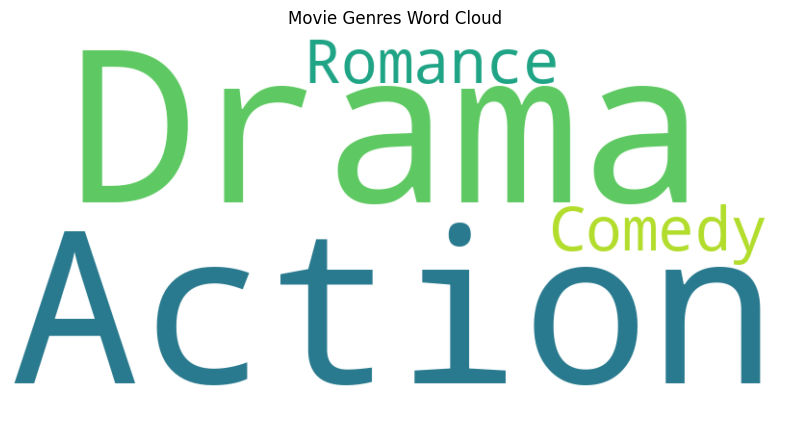

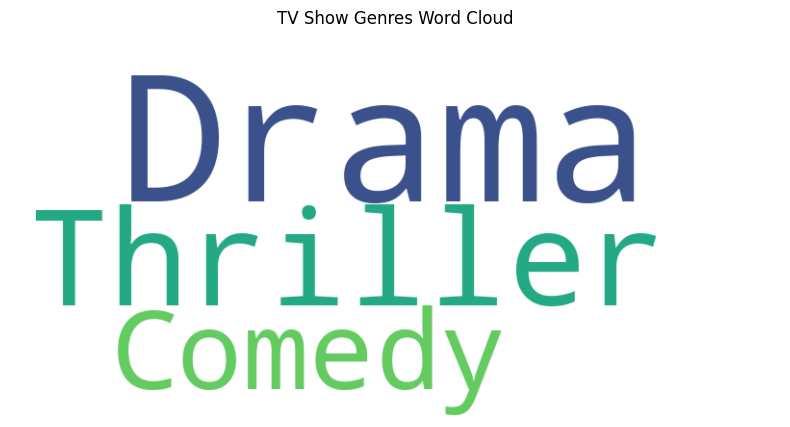

In [56]:
#Let's Visvalize it using word cloud
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Load data
# (Keep your existing data loading and DataFrame creation code)

# Create DataFrames
df_movies = pd.DataFrame(movies_data)
df_shows = pd.DataFrame(tv_show_data)

# Step 2: Count genres (corrected)
# Handle case where Genres might be a string (e.g., 'Action,Drama')
def extract_genres(genre_entry):
    if isinstance(genre_entry, list):
        return genre_entry
    elif isinstance(genre_entry, str):
        return [g.strip() for g in genre_entry.split(',')]
    return []

movies_genres = [genre for movie in df_movies['Genres'] for genre in extract_genres(movie)]
movies_genre_counts = Counter(movies_genres)
movies_genre_counts_df = pd.DataFrame.from_dict(movies_genre_counts, orient='index').reset_index()
movies_genre_counts_df.columns = ['Genre', 'Count']
movies_genre_counts_df = movies_genre_counts_df.sort_values(by='Count', ascending=False)
movies_genre_counts_df.to_csv('movies_genre_counts.csv', index=False)

# TV shows genres
shows_genres = [genre for show in df_shows['Genres'] for genre in extract_genres(show)]
shows_genre_counts = Counter(shows_genres)
shows_genre_counts_df = pd.DataFrame.from_dict(shows_genre_counts, orient='index').reset_index()
shows_genre_counts_df.columns = ['Genre', 'Count']
shows_genre_counts_df = shows_genre_counts_df.sort_values(by='Count', ascending=False)
shows_genre_counts_df.to_csv('shows_genre_counts.csv', index=False)

# Step 3: Generate word clouds
# Movies word cloud
# Corrected line: Pass the items() view of the Counter object to dict()
movies_freq = dict(movies_genre_counts.items())

# TV shows word cloud (assuming you'll add this)
shows_freq = dict(shows_genre_counts.items())

# Now you can use movies_freq and shows_freq to generate word clouds
# Example:
wordcloud_movies = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(movies_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_movies, interpolation='bilinear')
plt.axis('off')
plt.title('Movie Genres Word Cloud')
plt.show()

wordcloud_shows = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(shows_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_shows, interpolation='bilinear')
plt.axis('off')
plt.title('TV Show Genres Word Cloud')
plt.show()

## **Finding Predominant Streaming Service**

In [65]:
# Write Your Code here
# For Movies


streaming_counts = df_movies['Streaming Services'].explode().value_counts()

# Display the results
print("Streaming Service Counts:")
print(streaming_counts)

# Identify the predominant streaming service
predominant_service = streaming_counts.idxmax()
predominant_count = streaming_counts.max()

print(f"\nPredominant Streaming Service: {predominant_service} (appears {predominant_count} times)")


#For TV shows

# Flatten the 'Streaming Services' lists and count occurrences
streaming_counts = df_shows['Streaming Services'].explode().value_counts()

# Display the results
print("Streaming Service Counts:")
print(streaming_counts)

# Identify the predominant streaming service
predominant_service = streaming_counts.idxmax()
predominant_count = streaming_counts.max()

print(f"\nPredominant Streaming Service: {predominant_service} (appears {predominant_count} times)")

Streaming Service Counts:
Streaming Services
Netflix, Amazon Prime    1
Disney+                  1
Name: count, dtype: int64

Predominant Streaming Service: Netflix, Amazon Prime (appears 1 times)
Streaming Service Counts:
Streaming Services
Amazon Prime    2
Netflix         1
Name: count, dtype: int64

Predominant Streaming Service: Amazon Prime (appears 2 times)


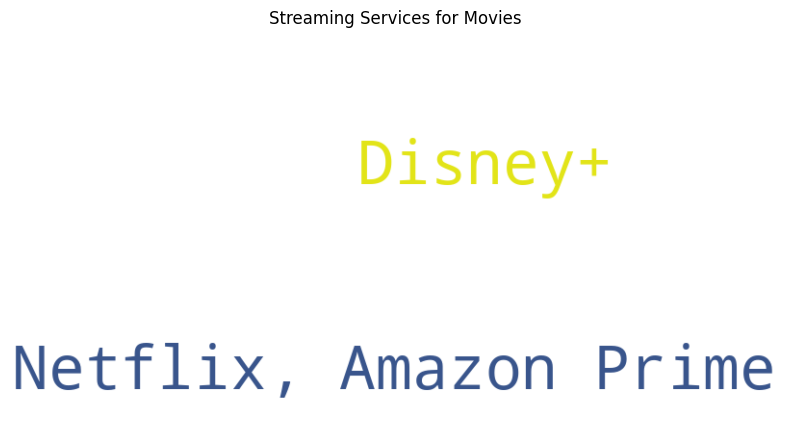

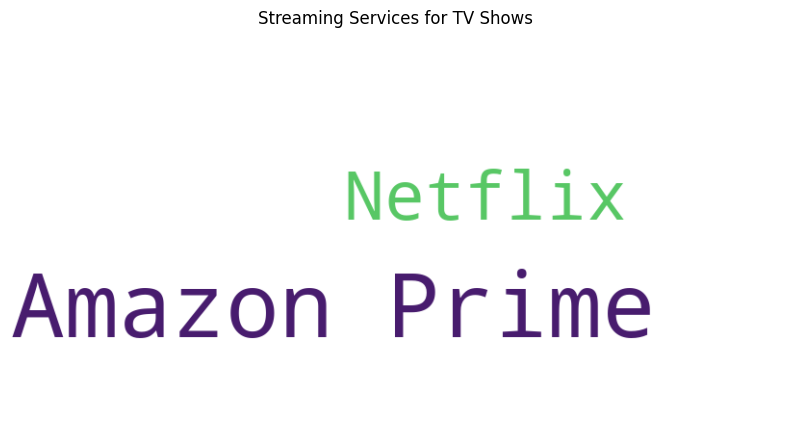

In [66]:
#Let's Visvalize it using word cloud
# Function to generate and display word cloud
def generate_wordcloud(frequencies, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          min_font_size=10, colormap='viridis').generate_from_frequencies(frequencies)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Get streaming service frequencies for movies
movie_streaming_counts = df_movies['Streaming Services'].explode().value_counts().to_dict()
# Get streaming service frequencies for TV shows
tv_streaming_counts = df_shows['Streaming Services'].explode().value_counts().to_dict()

# Generate word clouds
generate_wordcloud(movie_streaming_counts, 'Streaming Services for Movies')
generate_wordcloud(tv_streaming_counts, 'Streaming Services for TV Shows')

## **Task 3 :- Data Export**

In [67]:
#saving final dataframe as Final Data in csv format
df_movies.to_csv('movies_final_data.csv', index=False)
df_shows.to_csv('tv_shows_final_data.csv', index=False)

print("DataFrames exported successfully as 'movies_final_data.csv' and 'tv_shows_final_data.csv'")

DataFrames exported successfully as 'movies_final_data.csv' and 'tv_shows_final_data.csv'


In [68]:
#saving filter data as Filter Data in csv format

df_drama = df[df['Genres'].apply(lambda x: 'Drama' in x)]
df_netflix = df[df['Streaming Services'].apply(lambda x: 'Netflix' in x)]

df_drama.to_csv('filter_data_drama.csv', index=False)
df_netflix.to_csv('filter_data_netflix.csv', index=False)

print("Filtered DataFrames saved as 'filter_data_drama.csv' and 'filter_data_netflix.csv'")


Filtered DataFrames saved as 'filter_data_drama.csv' and 'filter_data_netflix.csv'


# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***